# <center>Challenge 2<center>

<p>Team Name:  B.C.
<p>Student Names: Brittney Jarreau, Caleb Charpentier, Leanne Nicholas
<p>Student W#s: 0455857, 0650629, 0670945

## Instructions
Use generic coding style unless hard-coded values are really necessary.<br>
Your code must be efficient and use self-explanatory naming.<br>
Use appropriate Python library methods for each task instead of using loops.<br>
Run your entire code and save. Then submit this <b>saved</b> copy.

## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import sklearn.model_selection as model_selection
from sklearn.tree import DecisionTreeClassifier  
from sklearn import metrics

# PART I

## Prepare Data

Use the data set provided below, prepare data in a csv file <i>data.csv</i> and write your code to read data into an object. The first line of the file should have headers.

![image.png](attachment:image.png)

In [2]:
data = pd.read_csv("./data.csv")
display(data)

,Day,Outlook,Temperature,Humidity,Wind,PlayTennis
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Cool,Normal,Weak,Yes


<b>Implement part of the ID3 algorithm to generate a decision tree.</b><br>
Write a function <i>findChild(...)</i> which takes inputs of a data set, a parent (Attribute=Value), and an attribute to be checked as a child. The function prints calculations using the following format.<br>
Add comments for each section of your code such as "parent node statistics", "parent node entropy", "ith check of the parent", "ith check's condition", "child node statistics", "child node entropy", "children's average entropy", "information Gain", "best condition", etc.

<b>Print calculations using the following format.</b><br>As an example, assume the parent is (A=a1) and the child attribute to be checked is B; assume the condition (B=b1) is to be checked at the ith check.<br>
PARENT (A=a1)<br>
>       numData:  .....                                               #Number of data points (feature vectors)
      nPos: ....., nNeg: .......                 #Number of data points for each class of positive and negative
      Entropy:
    Check-i: (B=b1)
      numLeft: ....., numRight: ..... #Number of data points at the left node (B=b1) and the right node (B != b1)
      nLeftPos: ....., nLeftNeg: .....                   #Number of data points for each class at the left node
      nRightPos: ....., nRightNeg: .....                #Number of data points for each class at the right node
      EntropyLeft: ....., EntropyRight: .....
      WAE: .....                                                                      #Weighted average entropy
      Information Gain: ..... 
    Best condition ID: ..., condition: (... = ...)                                           #(Attribute=Value)
        

In [3]:
def entropy(targets):  
    cats,counts = np.unique(targets,return_counts = True)  
    cat_counts = zip(cats, counts)
    entropy = np.sum([(-count/np.sum(counts))*np.log2(count/np.sum(counts)) for (cat, count) in cat_counts])  
    return entropy

def get_split(ds, target):
  grouped = ds.groupby(target).size()
  if 1 in grouped.index:
      pos = grouped[1]
  else:
      pos = 0
  
  if 0 in grouped.index:
      neg = grouped[0]
  else:
      neg = 0
  return pos, neg

def print_values(dataset, non_dataset, parent, target, ent, indentation):
  if indentation == 1:
      indent = "    "
  else:
      indent = "        "
  print("{}numLeft".format(indent), len(dataset), "numRight", len(non_dataset)) 

  nl_pos, nl_neg = get_split(dataset, target)
  nr_pos, nr_neg = get_split(non_dataset, target)

  print("{}nLeftPos".format(indent), nl_pos, "nLeftNeg", nl_neg) 
  print("{}nRightPos".format(indent), nr_pos, "nRightNeg", nr_neg)

  total_len = len(dataset) + len(non_dataset)
  left_ent = entropy(dataset[target])
  right_ent = entropy(non_dataset[target])
  print("{}EntropyLeft".format(indent), left_ent, "EntropyRight", right_ent)

  wae = (left_ent*len(dataset) + right_ent*len(non_dataset))/total_len 
  info_gain = ent - wae
  print("{}WAE: ".format(indent), wae)
  print("{}Information Gain: ".format(indent), info_gain)
  return info_gain
              
#This function will traverse from the parent node through the specified child node
def findChild(data_set, parent, child, target):
  #parent stats
  num_data = len(data_set)
  n_pos = data_set.groupby(target).size()[1]
  n_neg = data_set.groupby(target).size()[0]

  print("numData: ", num_data)
  print("nPos: ", n_pos, ", nNeg: ", n_neg)

  ent = entropy(data_set.PlayTennis)
  print("Entropy:", ent)
  
  #first split across the parent node
  max_gain = 0
  for value in np.unique(data_set[parent]):
      print("Check Parent: ", parent, " = ", value)
      sub_data = data.where(data[parent] == value).dropna()
      non_data = data.where(data[parent] != value).dropna() 
      print_values(sub_data, non_data, parent, target, ent, 1)

      #check child for left (sub_data) and right (non_data)
      features = pd.DataFrame(columns = ["Name", "Score"])
      for child_value in np.unique(sub_data[child]):
          print("    Check Child: ", child, " = ", child_value, " of parent = ", value)
          sub_data_left = sub_data.where(sub_data[child] == child_value).dropna()
          non_data_left = sub_data.where(sub_data[child] != child_value).dropna() 
          score = print_values(sub_data_left, non_data_left, child, target, ent, 2)
          features = features.append({'Name' : child_value, 'Score' : score}, ignore_index = True)
      
      best_feature = features.iloc[features.Score.idxmax()].Name
      best_score = features.iloc[features.Score.idxmax()].Score
      if best_score > max_gain:
          max_gain = best_score
      print("    Best Feature:", child, "=", best_feature, "for parent", parent, "=", value)
  return max_gain
  


## Test The Code

<b>Finding the first parent node.</b><br>
Start with the attribute "Wind" as the parent node. Calculate the parent node DT values.<br><br>
<b>Searching for a child node</b><br>
Consider attributes of "Outlook" and "Temperature"; determine which one would be the best as a child node.

In [4]:
lb = preprocessing.LabelBinarizer()
data.PlayTennis = lb.fit_transform(data.PlayTennis)

parent = "Wind"

outlook_max = findChild(data, parent, "Outlook", "PlayTennis")

temp_max = findChild(data, parent, "Temperature", "PlayTennis")

if outlook_max > temp_max:
  print("Best Selection is Outlook! Info Gain was better than Temperature by:", outlook_max - temp_max)
elif temp_max > outlook_max:
  print("Best Selection is Temperature! Info Gain was better than Outlook by:", temp_max - outlook_max)
else:
  print("The best achieved information gain for Outlook and Temperature was equivalent. Both are good choices!")


numData:  14
nPos:  9 , nNeg:  5
Entropy: 0.9402859586706309
Check Parent:  Wind  =  Strong
    numLeft 6 numRight 8
    nLeftPos 3 nLeftNeg 3
    nRightPos 6 nRightNeg 2
    EntropyLeft 1.0 EntropyRight 0.8112781244591328
    WAE:  0.8921589282623617
    Information Gain:  0.04812703040826927
    Check Child:  Outlook  =  Overcast  of parent =  Strong
        numLeft 2 numRight 4
        nLeftPos 2 nLeftNeg 0
        nRightPos 1 nRightNeg 3
        EntropyLeft 0.0 EntropyRight 0.8112781244591328
        WAE:  0.5408520829727552
        Information Gain:  0.3994338756978757
    Check Child:  Outlook  =  Rain  of parent =  Strong
        numLeft 2 numRight 4
        nLeftPos 0 nLeftNeg 2
        nRightPos 3 nRightNeg 1
        EntropyLeft 0.0 EntropyRight 0.8112781244591328
        WAE:  0.5408520829727552
        Information Gain:  0.3994338756978757
    Check Child:  Outlook  =  Sunny  of parent =  Strong
        numLeft 2 numRight 4
        nLeftPos 1 nLeftNeg 1
        nRightPos 2 n

It is clear from the output of findChild that the best selection between Temperature and Outlook is Outlook. This is decide because the maximum achieved information gain of Outlook 0.596 and the maximum for Temperature was only 0.333. This means selection of Outlook as the next feature leads to a better division of the tree.

# PART II

<b>Generate a decision tree by means of a Python library</b>
- Use 70% of the data for training and 30% for testing.
- Compare performance of the model based on “gini” and “entropy” measures. As a performance measure use sensitivity, specificity, AUC, and F1-score
- Plot performance measures on a single figure for “gini” and “entropy”. Group by performance measures.

Entropy Measures: 
GINI Measures: 


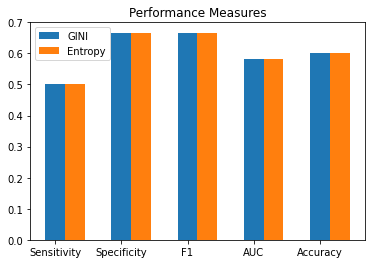

Essentially, whether you choose to use the decision tree classifier with entropy or gini
the performance will be roughly the same.


In [5]:
def get_scores(acc, labels, prediction):
    f1 = metrics.f1_score(labels, prediction)
    conf_matrix = metrics.confusion_matrix(labels, prediction)
    sens = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
    spec = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
    auc = metrics.roc_auc_score(labels, prediction)
    return sens, spec, f1, auc, acc

def add_plots(f1, sens, spec, auc, title):
  plt.bar(1, sens, label="{} Sensitivity".format(title))
  plt.bar(2, spec, label="{} Specificity".format(title))
  plt.bar(3, auc, label="{} AUC".format(title))
  plt.bar(4, f1, label="{} F1".format(title))

samples = data.drop(["PlayTennis", "Day"], axis=1)
labels = data.PlayTennis

#DecisionTreeClassifier works on numeric only, need to encode
for cat in samples.columns:
  le = preprocessing.LabelEncoder()
  samples[cat] = le.fit_transform(samples[cat].values)

X_train, X_test, y_train, y_test = model_selection.train_test_split(samples, labels, train_size=0.70,test_size=0.30, random_state=42)

print("Entropy Measures: ") 
tree = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)  
prediction = tree.predict(X_test)   
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
e_values = [sens, spec, f1, AUC, acc]

print("GINI Measures: ")
tree = DecisionTreeClassifier(criterion = 'gini').fit(X_train, y_train)  
prediction = tree.predict(X_test)  
acc = tree.score(X_test, y_test)
sens, spec, f1, AUC, acc = get_scores(acc, y_test, prediction)
g_values = [sens, spec, f1, AUC, acc]

labels = ["Sensitivity", "Specificity", "F1", "AUC", "Accuracy"]
plt.title("Performance Measures")
width =0.3
plt.xticks(range(len(labels)), labels)
plt.bar(np.arange(len(g_values)), g_values, width=width, label="GINI")
plt.bar(np.arange(len(e_values)) + width, e_values, width=width, label="Entropy")
plt.legend()
plt.show()

print("Essentially, whether you choose to use the decision tree classifier with entropy or gini")
print("the performance will be roughly the same.")

## <center> REFERENCES </center>
List resources (book, internet page, etc.) that you used to complete this challenge.

https://pythonbasics.org/matplotlib-bar-chart/
https://www.statology.org/auc-in-python/
https://gist.github.com/jaradc/eeddf20932c0347928d0da5a09298147#:~:text=Four%20different%20ways%20to%20calculate%20entropy%20in%20Python,%28%20labels%2C%20return_counts%3DTrue%29%20return%20entropy%20%28%20counts%2C%20base%3Dbase%29